# Семинар 6. Степенной метод. QR алгоритм

## Экспериментально посмотрим на сходимость степенного метода

$$x_{k+1} = \frac{Ax_k}{\|Ax_k\|} $$

- Теоретическая скорость сходимости **линейная** с фактором $\frac{|\lambda_2|}{|\lambda_1|}$

In [93]:
import numpy as np

def power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv = [x]
    for i in range(max_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        conv.append(x)
        eigval = x @ (A @ x)
        res = A @ x - eigval * x
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv

### Симметричная положительно определённая матрица

In [99]:
np.random.seed(0)
n = 100
A = np.random.randn(n, n)
A = A.T @ A

true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[9.08050598e-05 5.98738933e-03 9.44215434e-02 3.69030606e-01
 4.09806706e-01 4.55736343e-01 9.08505859e-01 1.33621119e+00
 1.41027596e+00 1.85518946e+00 2.86702867e+00 3.18195816e+00
 3.67297697e+00 4.33200403e+00 4.87305139e+00 5.84238777e+00
 7.22920186e+00 7.92468749e+00 8.25763141e+00 9.77947698e+00
 1.02729795e+01 1.17100102e+01 1.23221010e+01 1.29426268e+01
 1.57507249e+01 1.67271149e+01 1.69323290e+01 1.83603872e+01
 1.92439586e+01 2.11926036e+01 2.33119037e+01 2.44001004e+01
 2.68565712e+01 2.78273001e+01 3.07023785e+01 3.17923926e+01
 3.32659145e+01 3.61619443e+01 3.66202382e+01 4.05640198e+01
 4.12172214e+01 4.20182719e+01 4.40093414e+01 4.59955289e+01
 4.91454558e+01 5.25278841e+01 5.36208303e+01 5.66290426e+01
 6.11072508e+01 6.36642417e+01 6.67790025e+01 7.18717500e+01
 7.53102151e+01 7.69637054e+01 8.05181031e+01 8.42937297e+01
 8.66480959e+01 9.06328877e+01 9.70358984e+01 9.91344601e+01
 1.02186114e+02 1.04807972e+02 1.06496298e+02 1.08614964e+02
 1.11090944e+02 1.133129

In [100]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 100, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.20149504  0.02111166  0.21137266 -0.01086659 -0.00780266 -0.03149369
  0.03317797 -0.10571077  0.05631894 -0.00708571 -0.2345815  -0.0323832
  0.02293809 -0.1030258   0.17442166  0.1414175   0.06648175  0.10508005
  0.21889482  0.02946043  0.03890899  0.07901664 -0.01098292 -0.00222161
  0.02816873  0.14741542  0.05526265 -0.16585199 -0.16786561  0.00702125
 -0.00512802  0.053801    0.08472981  0.04250767 -0.043731   -0.02308412
 -0.03098449  0.01041469  0.08245142  0.07971054 -0.09226347 -0.09864837
  0.16299778 -0.11417104  0.00056612 -0.09476633  0.10988122 -0.09608952
  0.09752086  0.0720101   0.01995432 -0.08523925  0.11743321  0.03655672
  0.05399115  0.2372778   0.02466907  0.00672446 -0.01103931 -0.05729322
 -0.00972008 -0.0079006  -0.04444629 -0.01459691 -0.07719303  0.1637581
  0.11115478  0.19175726 -0.13649498  0.00392001 -0.18193311 -0.09988945
 -0.02479226  0.11426804  0.14887836  0.03728107 -0.00812182  0.07419095
 -0.00108646  0.06527702  0.17841344  0.15647811  0.0

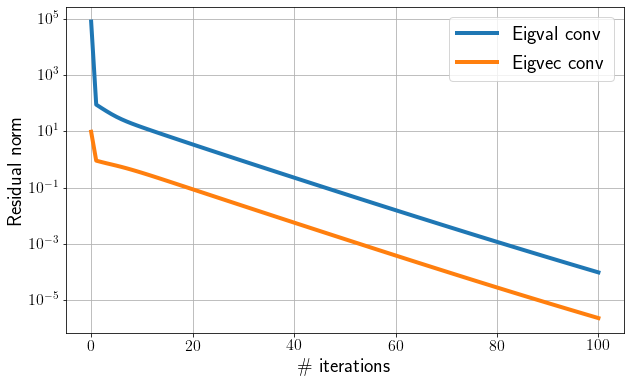

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")
power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, -1] * true_eigvec[:, -1]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [102]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
print(true_eigvals[-2] / true_eigvals[-1])

[0.00111126 0.76334892 0.77052966 0.78185062 0.79891308 0.81791715
 0.83491388 0.84772505 0.85626571 0.86152633 0.86463942 0.86647893
 0.86761034 0.86836437 0.86892173 0.86937599 0.86977319 0.87013476
 0.87047004 0.87078285 0.87107473 0.87134649 0.87159886 0.87183274
 0.87204924 0.87224961 0.87243524 0.87260753 0.87276791 0.87291776
 0.87305838 0.87319102 0.87331682 0.87343685 0.87355206 0.87366334
 0.87377149 0.87387723 0.8739812  0.874084   0.87418613 0.87428809
 0.87439029 0.87449311 0.87459691 0.87470199 0.87480864 0.8749171
 0.87502763 0.87514041 0.87525565 0.87537351 0.87549416 0.87561773
 0.87574437 0.87587417 0.87600725 0.8761437  0.8762836  0.87642702
 0.87657402 0.87672465 0.87687895 0.87703694 0.87719864 0.87736406
 0.87753319 0.87770602 0.87788251 0.87806263 0.87824633 0.87843354
 0.8786242  0.87881821 0.87901548 0.8792159  0.87941935 0.8796257
 0.87983481 0.88004652 0.88026067 0.8804771  0.88069561 0.88091602
 0.88113813 0.88136174 0.88158663 0.88181259 0.8820394  0.882266

### Симметричная матрица

- Cобственные значений вещественные

In [106]:
n = 10
A = np.random.randn(n, n)
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[-8.61048661 -3.85659192 -2.54678979 -0.27970044  0.9388054   2.18655001
  2.73246746  4.08978992  5.30115507  7.08889719]
[[-0.25513076 -0.06252921 -0.0692556  -0.52676901 -0.43543543 -0.09169641
   0.5912155   0.21516116  0.22230254 -0.07386281]
 [ 0.22245595  0.27523843 -0.42968365  0.29042369 -0.60920005 -0.11024123
  -0.13673533  0.33696833 -0.27131146  0.12903974]
 [-0.31804172  0.02659569 -0.06607188  0.00385438 -0.37662599  0.22565677
   0.02436865 -0.77597881 -0.28167364  0.13753796]
 [-0.49401161 -0.09392092  0.26477529  0.09385435 -0.12687791 -0.73787128
  -0.30682621  0.02975823 -0.08031053 -0.07865824]
 [ 0.26551038 -0.12734143  0.04624029 -0.24253592 -0.38432658  0.07464717
  -0.55752365 -0.16820583  0.56667201 -0.19698848]
 [-0.41122551  0.41704327 -0.15409232 -0.38398684  0.1846518   0.18976975
  -0.37519098  0.19941191  0.09051752  0.47638482]
 [-0.08832906 -0.44493863  0.37562437  0.32253412 -0.23013891  0.23840742
   0.0438475   0.21511463  0.17682481  0.59986643]
 [

In [107]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.25513075 -0.22245595  0.31804173  0.4940116  -0.2655104   0.41122554
  0.0883291  -0.20369759 -0.32369565 -0.38281565]
-8.610486614573762


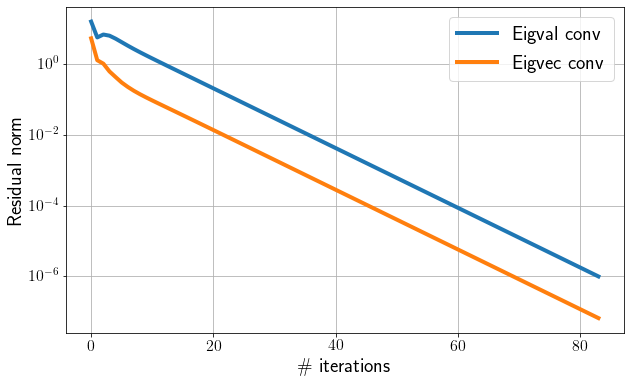

In [108]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [109]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.35663948 1.20673238 0.92789305 0.82360616 0.79543551 0.79531096
 0.80303133 0.81069293 0.81617412 0.81956537 0.8214895  0.82251284
 0.82302406 0.82325975 0.82335449 0.82338129 0.82337818 0.82336405
 0.82334769 0.82333281 0.82332059 0.82331112 0.82330403 0.82329885
 0.82329513 0.82329249 0.82329063 0.82328934 0.82328844 0.82328782
 0.8232874  0.82328711 0.82328691 0.82328677 0.82328668 0.82328661
 0.82328657 0.82328654 0.82328652 0.82328651 0.8232865  0.82328649
 0.82328649 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648
 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648
 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648
 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648
 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648
 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648
 0.82328648 0.82328648 0.82328648 0.82328648 0.82328648]
[0.24057804 0.79808784 0.60340714 0.69333955 0.70024188 0.75020187
 0.77

## Несимметричная матрица

In [113]:
A = np.random.randn(n, n)

true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec)

[-2.16876059+2.36653506j -2.16876059-2.36653506j  0.88057471+2.64153395j
  0.88057471-2.64153395j  1.71045255+0.35258153j  1.71045255-0.35258153j
 -0.99410388+0.68827313j -0.99410388-0.68827313j  0.17116704+0.6820587j
  0.17116704-0.6820587j ]
[0.70320853 0.70320853 1.20911638 1.20911638 1.74641395 1.74641395
 2.78444131 2.78444131 3.20998608 3.20998608]
[[ 0.26657508-0.00200193j  0.26657508+0.00200193j -0.1438417 +0.05898648j
  -0.1438417 -0.05898648j  0.11084996+0.09270145j  0.11084996-0.09270145j
   0.15835992+0.04108055j  0.15835992-0.04108055j  0.03134198+0.1275214j
   0.03134198-0.1275214j ]
 [-0.19870309+0.27887529j -0.19870309-0.27887529j -0.61828967+0.j
  -0.61828967-0.j          0.0760079 +0.10777555j  0.0760079 -0.10777555j
  -0.12089131-0.28436715j -0.12089131+0.28436715j  0.26348093-0.10963247j
   0.26348093+0.10963247j]
 [-0.19429107+0.06731809j -0.19429107-0.06731809j -0.01377608-0.04949236j
  -0.01377608+0.04949236j  0.34014524+0.13915111j  0.34014524-0.13915111j
  -0.0

In [114]:
x0 = np.random.randn(n) + 1j * np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 4000, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.17723423+0.19382756j -0.09721772-0.42693005j -0.12089147-0.20833225j
 -0.03846834+0.21900876j -0.00075036-0.39424191j -0.12348399+0.04589335j
  0.13223092-0.26111013j -0.22654757-0.20870937j -0.05127389+0.0487114j
  0.35521168+0.38383698j]
(1.3678149826900252-1.2736218961007895j)


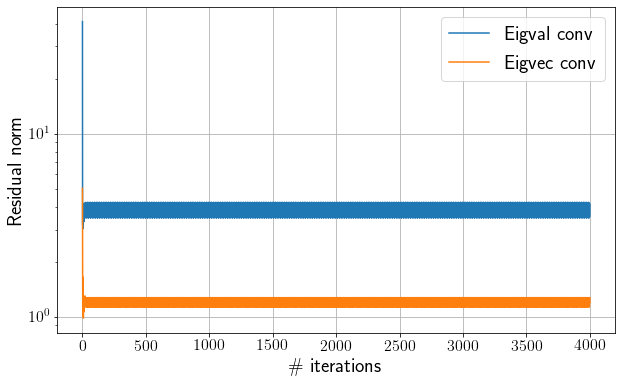

In [115]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [116]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.07811809 0.99145656 0.95387387 ... 0.87862328 0.96856575 1.17946532]
[0.37000468 0.61691564 1.01553499 ... 1.04216223 1.08150394 0.94061863]
1.0


### Если $\lambda^*_2 = \lambda_1$, то степенной метод осциллирует и не сходится! 

## Степенной метод для максимального сингулярного числа

In [194]:
def max_singular_value(A, x0, max_iter, eps):
    x = x0.copy()
    conv_x = []
    conv_y = []
    for i in range(max_iter):
        y = A @ x
        y = y / np.linalg.norm(y)
        conv_y.append(y.copy())
        x = A.T @ y
        x = x / np.linalg.norm(x)
        conv_x.append(x.copy())
        singval = y @ (A @ x)
        res = A @ x - singval * y
        if np.linalg.norm(res) < eps:
            break
    return x, y, singval, conv_x, conv_y

In [195]:
m = 100
n = 100
max_iter = 20000
A = np.random.randn(m, n)
x0 = np.random.randn(n)
u, v, sigma, conv_x, conv_y = max_singular_value(A, x0, max_iter, 1e-4)
U, s, V = np.linalg.svd(A, full_matrices=False)

max_eigvec, max_eigval, conv = power_method(A.T @ A, x0, max_iter, 1e-4)

In [196]:
print(sigma)
print(s[0])
print(np.sqrt(max_eigval))

20.167164065731537
20.16716406840088
20.16716406839453


In [197]:
print(np.sqrt(power_method_singval_conv[1:] / power_method_singval_conv[:-1]))
print(s[1] / s[0])

[0.87792426 0.92858724 0.90380411 0.8919542  0.89381115 0.90102153
 0.90861505 0.91476577 0.91926174 0.92248534 0.92491195 0.9269275
 0.92879654 0.93068174 0.93267189 0.93480442 0.93708116 0.93947902
 0.941958   0.94446798 0.94695493 0.94936655 0.95165693 0.95378983
 0.95574029 0.95749474 0.95904987 0.96041074 0.96158856 0.96259853
 0.96345798 0.96418492 0.96479691 0.96531045 0.9657405  0.96610036
 0.9664016  0.9666542  0.96686659 0.96704592 0.96719812 0.96732814
 0.96744007 0.96753727 0.96762251 0.96769805 0.96776573 0.96782705
 0.96788323 0.96793528 0.96798398 0.96802999 0.96807384 0.96811594
 0.96815664 0.96819621 0.96823487 0.96827279 0.96831011 0.96834693
 0.96838335 0.96841944 0.96845523 0.96849078 0.96852612 0.96856125
 0.96859621 0.968631   0.96866562 0.96870008 0.96873438 0.96876853
 0.9688025  0.96883631 0.96886995 0.96890341 0.96893668 0.96896976
 0.96900264 0.96903532 0.96906778 0.96910003 0.96913205 0.96916384
 0.96919539 0.9692267  0.96925775 0.96928854 0.96931908 0.96934

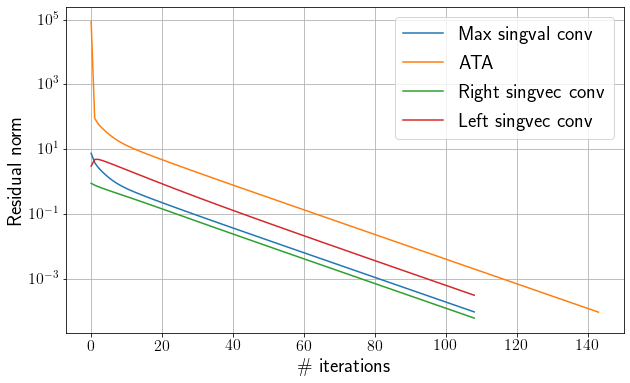

In [198]:
power_method_singval_conv = np.array([np.linalg.norm(A @ x - y @ (A @ x) * y) for x, y in zip(conv_x, conv_y)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_singval_conv, label="Max singval conv")

plt.plot(np.array([np.linalg.norm(A.T @ A @ x - x @ (A.T @ A @ x) * x) for x in conv]), label="ATA")

power_method_rightsingvec_conv = np.array([np.linalg.norm(x - x[0] / V[0, 0] * V[0, :].ravel()) for x in conv_x])
plt.plot(power_method_rightsingvec_conv, label="Right singvec conv")

power_method_leftsingvec_conv = np.array([np.linalg.norm(y - y[0] / U[0, 0] * U[:, 0]) for y in conv_y])
plt.plot(power_method_leftsingvec_conv, label="Left singvec conv")

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

## Другие проблемные случаи для поиска максимального по модулю собственного значения

1) $\lambda_1 = \lambda_2$

2) $\lambda_1 = -\lambda_2$

### Если $\lambda_1 = \lambda_2$ 

In [160]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, 2] + list(np.random.rand(n - 2))) @ Q.T

In [161]:
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[0.02008642 0.02140786 0.02241596 0.02589456 0.03420331 0.04993936
 0.05936717 0.06960574 0.07556917 0.08505168 0.10690188 0.10872478
 0.11236629 0.12974489 0.14547573 0.1513387  0.175927   0.17818235
 0.18095319 0.1810615  0.18806815 0.18995038 0.20033432 0.21164479
 0.23868761 0.25359819 0.26369019 0.27426917 0.27532827 0.27796388
 0.28824361 0.31493529 0.36460017 0.3709633  0.37760794 0.38150488
 0.38527079 0.39723203 0.40469208 0.40921147 0.41665167 0.43333612
 0.44907336 0.45176696 0.47114553 0.47905631 0.49409229 0.50028761
 0.50360713 0.50819353 0.54071795 0.56909787 0.56954551 0.59165629
 0.59588949 0.5981202  0.60303168 0.614568   0.6257656  0.62651864
 0.62851077 0.63001438 0.63556431 0.64623187 0.64932541 0.65346986
 0.66692136 0.69166261 0.70701347 0.72458438 0.73935829 0.74732051
 0.75343685 0.75740952 0.76694906 0.7767082  0.77676455 0.78548952
 0.78901953 0.79233343 0.81065026 0.83086734 0.83149841 0.84807786
 0.85035599 0.85671053 0.87874804 0.88709514 0.89519947 0.9225

In [164]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 1000, 1e-6)
print(max_eigvec, np.linalg.norm(max_eigvec))
print(max_eigval)

[-1.06127436e-02  6.78888003e-02 -1.04501100e-01  1.07689971e-02
  3.27838598e-02 -6.45828201e-02  1.10092206e-02  1.07226201e-01
 -6.24700642e-02 -8.27976260e-02  7.38003878e-02  6.79558817e-02
  2.80826433e-01 -5.28449215e-02 -1.76477577e-01 -5.13408822e-02
  7.11447167e-02 -1.04190488e-01 -1.12903929e-01 -1.85324585e-02
  1.03811522e-01  7.40831608e-02  6.68314129e-02  8.87054512e-02
 -1.76858509e-01 -1.53880921e-02  1.26335389e-01 -1.66486492e-01
 -7.72124824e-02 -1.12636209e-01 -1.66111376e-01 -1.39314748e-01
  9.50481611e-02  1.72905979e-01  6.96063522e-03  9.26812451e-02
  1.84284989e-01  3.79948957e-02 -1.97928698e-02 -1.71573244e-01
  7.92309132e-02 -1.82124878e-01 -1.33931843e-02  3.97772832e-02
 -5.27815050e-02  6.07548893e-02 -1.62606374e-03  6.98443678e-02
 -5.76840442e-03 -2.68783100e-02 -5.63808117e-02  4.47175970e-02
  2.23177621e-04 -1.01147130e-01 -6.14508403e-03  3.60008451e-02
 -7.79715322e-03  1.30845967e-01  1.41514963e-02  2.91640220e-02
 -9.21166473e-02  9.53634

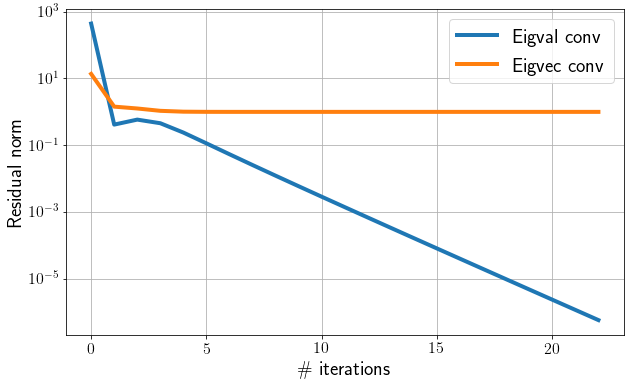

In [165]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [168]:
alpha = np.linalg.lstsq(true_eigvec[:, n-2:], max_eigvec, rcond=None)[0]
print(alpha)

[ 0.9968275  -0.07959227]


In [169]:
print("Accuracy = {}".format(np.linalg.norm(true_eigvec[:, n-2:] @ alpha - max_eigvec)))

Accuracy = 5.598148227226629e-07


### Если $\lambda_1 = -\lambda_2$

In [170]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, -2] + list(np.random.rand(n - 2))) @ Q.T

In [172]:
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[-2.          0.02758757  0.03385891  0.03695993  0.05017623  0.05048221
  0.05067216  0.06322825  0.0636333   0.0698557   0.08038562  0.08726109
  0.08860725  0.09530253  0.09613168  0.09621899  0.12429812  0.15448181
  0.17512833  0.17692935  0.17897333  0.18348431  0.18415076  0.18783721
  0.1889341   0.19599802  0.20729099  0.21934144  0.23128556  0.24548163
  0.24649978  0.2765182   0.27754471  0.28338208  0.28949609  0.30314122
  0.30685771  0.31579599  0.3377595   0.34257715  0.36070068  0.3678631
  0.36920737  0.37394591  0.37694607  0.38755859  0.41592633  0.42108433
  0.42261864  0.4240153   0.42783761  0.44114719  0.44378146  0.44461848
  0.46744859  0.47149639  0.48665376  0.49177645  0.52549973  0.52912111
  0.56032442  0.56300716  0.56520041  0.56710325  0.56837414  0.60441289
  0.62137366  0.65854602  0.68552649  0.69191354  0.708202    0.72745894
  0.73910831  0.7416543   0.74287446  0.74787385  0.74798008  0.76121617
  0.76450321  0.78961834  0.79731004  0.81919919  0.

In [173]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 1000, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.13016163  0.08416795  0.18842993 -0.0906004  -0.0933216   0.0701698
  0.10180757 -0.17530844 -0.06607556  0.02309969 -0.03565756  0.06029751
 -0.13993817  0.11978141 -0.10805633 -0.03575319 -0.08086227  0.07069391
  0.13159286  0.0226421   0.0146758  -0.07700928 -0.02166633 -0.2100961
 -0.04992481 -0.06708214 -0.13115851 -0.01962476  0.13762516 -0.17926883
  0.13710191 -0.0922936   0.00256794 -0.05973978 -0.01916618 -0.03921299
  0.01263338  0.04494502  0.07652736  0.035351   -0.13459893  0.08107362
 -0.02021443 -0.02940069  0.02293267 -0.01394442  0.0062745  -0.22208237
 -0.02394064 -0.05059291  0.12431545 -0.03729898 -0.15965682  0.17744071
 -0.01132518 -0.15139785  0.07420981  0.03745272  0.04182613  0.13295984
  0.11460563  0.05050747  0.17280734 -0.14735083 -0.10086552 -0.00735431
 -0.2184886  -0.16727563 -0.10140203 -0.17465816  0.01259542  0.11536362
 -0.14247907 -0.15876815 -0.073401   -0.05817324 -0.14719672 -0.05566404
  0.00820563  0.14594863 -0.05581049 -0.0414607  -0.1

In [177]:
np.linalg.norm(conv[-1] - conv[-2])
power_method_eigvec_conv

array([18.97809967,  3.92722686,  6.42246428, ...,  6.92851027,
        6.92851027,  6.92851027])

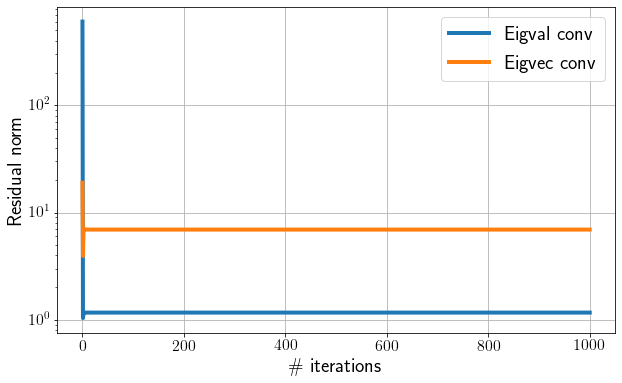

In [174]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

## Блочный степенной метод

- Ищем $k$ cтарших собственных значения и вектора
- Этапы аналогичны степенному методу для максимального по модулю собственного значения
    - Умножение матрицы на набор векторов
    - Аналог нормализации для матриц?

In [178]:
def block_power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv_vec = [x]
    conv_val = [np.einsum('ik,ij,jk->k',x, A, x)]
    for i in range(max_iter):
        x = A @ x
        x, _ = np.linalg.qr(x)
        conv_vec.append(x)
        eigval = np.einsum('ik,ij,jk->k', x, A, x)
        conv_val.append(eigval)
        res = A @ x - (eigval[:, np.newaxis] * x.T).T
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv_vec, conv_val

### Немного про einsum

In [186]:
A = np.random.randn(n, n)
print(np.trace(A), np.einsum('ii', A))
print(np.diag(A) - np.einsum("ii->i", A))
print(np.einsum("ij->j", A) - np.sum(A, axis=0))

-0.21412322602367861 -0.21412322602367717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [187]:
x = np.random.randn(n)
print(A @ x - np.einsum('ij,j', A, x))

[-4.44089210e-16  3.55271368e-15  4.44089210e-15  1.77635684e-15
 -3.55271368e-15  4.44089210e-16 -1.77635684e-15 -1.77635684e-15
 -1.55431223e-15  0.00000000e+00  3.77475828e-15  1.77635684e-15
 -3.55271368e-15  7.10542736e-15  0.00000000e+00  0.00000000e+00
  3.55271368e-15  0.00000000e+00  0.00000000e+00 -2.66453526e-15
 -3.55271368e-15  4.99600361e-16 -3.55271368e-15  5.32907052e-15
  0.00000000e+00 -1.99840144e-15  1.33226763e-15  3.55271368e-15
  3.55271368e-15  3.55271368e-15 -4.44089210e-16  6.49480469e-15
  2.66453526e-15 -1.77635684e-15 -3.55271368e-15  0.00000000e+00
 -3.55271368e-15  5.32907052e-15  1.77635684e-15  0.00000000e+00
  0.00000000e+00  1.77635684e-15  1.77635684e-15  1.77635684e-15
  1.77635684e-15 -4.44089210e-16 -3.55271368e-15 -4.44089210e-16
  1.11022302e-15 -2.66453526e-15  3.55271368e-15  2.66453526e-15
  3.88578059e-15  5.32907052e-15  1.77635684e-15  0.00000000e+00
  8.88178420e-16  5.32907052e-15 -3.55271368e-15  4.44089210e-16
 -1.77635684e-15  0.00000

In [188]:
B = np.random.randn(n, n)
print(np.diag(A @ B) - np.einsum('ij,ji->i', A, B))

[ 8.88178420e-16 -1.77635684e-15 -4.21884749e-15  0.00000000e+00
  0.00000000e+00  1.77635684e-15  8.88178420e-16 -1.77635684e-15
  0.00000000e+00  8.88178420e-16  0.00000000e+00  1.77635684e-15
  0.00000000e+00  0.00000000e+00 -2.66453526e-15 -8.88178420e-16
 -1.77635684e-15 -7.77156117e-16  0.00000000e+00 -1.77635684e-15
  0.00000000e+00 -1.77635684e-15 -1.77635684e-15  0.00000000e+00
 -1.77635684e-15 -6.66133815e-16 -1.77635684e-15  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.77635684e-15  0.00000000e+00  1.77635684e-15 -7.10542736e-15
 -8.88178420e-16 -1.77635684e-15  8.88178420e-16 -8.88178420e-16
  0.00000000e+00  4.44089210e-15  0.00000000e+00 -2.66453526e-15
 -1.77635684e-15 -8.88178420e-16 -8.88178420e-16 -8.88178420e-16
  2.22044605e-15  3.55271368e-15 -8.88178420e-16  1.66533454e-15
 -7.10542736e-15 -7.10542736e-15  0.00000000e+00 -1.97064587e-15
  0.00000000e+00 -4.44089210e-16 -4.44089210e-16 -1.77635684e-15
  3.55271368e-15 -1.77635

### Более подробное об этой операции см. [тут](https://obilaniu6266h16.wordpress.com/2016/02/04/einstein-summation-in-numpy/)

## Вернёмся к блочному степенному методу

In [191]:
block_size = 3
n = 10
A = np.random.randn(n, n)
A = A.T @ A
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[ 0.13667257  0.24594346  1.49671866  2.00019072  5.5754419  12.85373375
 13.06338092 20.49433594 25.89913379 39.15712683]
[[ 0.60426692 -0.18769617 -0.13409066  0.44706793 -0.09510907 -0.33279642
  -0.09952021  0.48463227  0.08658801 -0.09855061]
 [-0.21655158 -0.09545903  0.55718089  0.63398018  0.063534    0.08658202
  -0.34175311 -0.23794884  0.21529564 -0.01764962]
 [ 0.34313366  0.32540598 -0.35033254 -0.06019388 -0.03471395  0.4514748
  -0.51366779 -0.23532642  0.31285171 -0.16694366]
 [-0.34695034  0.02255482 -0.07764918 -0.06958919  0.24675194 -0.15460022
  -0.29503492  0.24538339 -0.20408131 -0.77107013]
 [-0.27895266  0.0121989  -0.08370454  0.05006053  0.21891585  0.42996461
  -0.23086884  0.6670614  -0.03791468  0.42428943]
 [ 0.39199732  0.099514    0.55506228 -0.12198374  0.03475056  0.5024397
   0.30084755  0.19819045 -0.1801961  -0.31232725]
 [-0.30312827  0.27086395 -0.26898536  0.43061804 -0.58145892  0.23678601
   0.36249207  0.09535418 -0.01635814 -0.20503258]
 [ 0

In [192]:
x0 = np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.09855061 -0.08658806  0.48463226]
 [-0.01764962 -0.21529562 -0.23794887]
 [-0.16694366 -0.31285169 -0.23532645]
 [-0.77107013  0.20408128  0.24538341]
 [ 0.42428943  0.03791461  0.66706141]
 [-0.31232725  0.18019608  0.19819047]
 [-0.20503258  0.01635813  0.09535418]
 [-0.044652    0.4560908  -0.21441533]
 [ 0.19518372  0.59394742  0.01442994]
 [-0.08864681 -0.46006181  0.23107442]]
[39.15712683 25.89913379 20.49433594]
[[-0.09855061  0.08658801  0.48463227]
 [-0.01764962  0.21529564 -0.23794884]
 [-0.16694366  0.31285171 -0.23532642]
 [-0.77107013 -0.20408131  0.24538339]
 [ 0.42428943 -0.03791468  0.6670614 ]
 [-0.31232725 -0.1801961   0.19819045]
 [-0.20503258 -0.01635814  0.09535418]
 [-0.044652   -0.45609077 -0.21441538]
 [ 0.19518372 -0.59394742  0.01442987]
 [-0.08864681  0.46006179  0.23107447]]


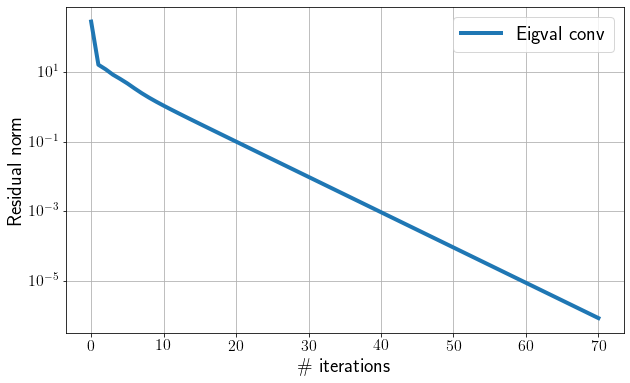

In [193]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [117]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(true_eigvals[-4] / true_eigvals[-3])
print(true_eigvals[-1], true_eigvals[-2], true_eigvals[-3])

[0.02150471 0.49504562 0.57330245 0.65194056 0.70818045 0.75011071
 0.77570554 0.78723868 0.7907368  0.79095939 0.79031391 0.78970421
 0.78935329 0.78924262 0.78929634 0.78944435 0.78963706 0.78984388
 0.79004788 0.79024084 0.79041964 0.79058386 0.79073442 0.79087275
 0.79100034 0.7911186  0.79122874 0.79133175 0.79142846 0.79151954
 0.79160552 0.79168684 0.79176386 0.79183688 0.79190616 0.79197192
 0.79203436 0.79209364 0.79214994 0.79220341 0.79225417 0.79230237
 0.79234813 0.79239155 0.79243276 0.79247187 0.79250896 0.79254415
 0.79257752 0.79260915 0.79263915 0.79266758 0.79269453 0.79272007
 0.79274427 0.7927672  0.79278892 0.79280949 0.79282897 0.79284742
 0.7928649  0.79288144 0.7928971  0.79291193 0.79292597 0.79293925
 0.79295183 0.79296373 0.79297499]
0.7931716980054303
49.29861083650784 26.489051977195768 17.45962262942466


### Несимметричный случай

In [86]:
A = np.random.randn(n, n)

# A = np.random.randn(n, n)
# Q, _ = np.linalg.qr(A)
# A = Q @ np.diagflat([2, 2, 2] + list(np.random.rand(n - 3))) @ Q.T

In [87]:
true_eigvals, true_eigvec = np.linalg.eig(A)
block_size = 3
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec.round(5))

[ 3.06838598+0.j         -2.31344654+1.18200744j -2.31344654-1.18200744j
  0.75305127+1.90093489j  0.75305127-1.90093489j -0.88288068+1.48872998j
 -0.88288068-1.48872998j  0.78706991+0.36474996j  0.78706991-0.36474996j
 -0.84075908+0.j        ]
[0.84075908 0.86748002 0.86748002 1.73083657 1.73083657 2.04466127
 2.04466127 2.59791772 2.59791772 3.06838598]
[[-0.23429+0.j      -0.21933+0.20767j -0.21933-0.20767j  0.16437+0.09736j
   0.16437-0.09736j  0.29776-0.17504j  0.29776+0.17504j  0.10549-0.30279j
   0.10549+0.30279j -0.04317+0.j     ]
 [ 0.5203 +0.j      -0.36054-0.13962j -0.36054+0.13962j  0.24173+0.25342j
   0.24173-0.25342j  0.19973-0.03282j  0.19973+0.03282j  0.23972-0.10406j
   0.23972+0.10406j -0.20022+0.j     ]
 [ 0.13478+0.j       0.46095+0.j       0.46095-0.j       0.02521+0.11215j
   0.02521-0.11215j -0.17194+0.01238j -0.17194-0.01238j -0.23955-0.19038j
  -0.23955+0.19038j  0.19383+0.j     ]
 [-0.38962+0.j       0.04623-0.00466j  0.04623+0.00466j -0.18016-0.03476j
  -0.18

In [90]:
x0 = np.random.randn(n, block_size) #+ 1j * np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.23428636 -0.48939338  0.09687676]
 [ 0.52030405  0.00260625  0.39011415]
 [ 0.13477928  0.35450994 -0.51362813]
 [-0.38962469 -0.00839508  0.03998234]
 [ 0.2777723   0.0333413  -0.17276611]
 [-0.36594661 -0.21346735 -0.38334   ]
 [-0.28616996  0.70558098  0.23455394]
 [-0.31963197 -0.02071723 -0.07242365]
 [-0.00916342 -0.23530553  0.39499858]
 [-0.33046114  0.1855187   0.42418285]]
[ 3.06838598 -2.59194361 -2.03494946]
[[-0.04317115+0.j          0.10548865+0.30279143j  0.10548865-0.30279143j]
 [-0.20021665+0.j          0.23972272+0.10406348j  0.23972272-0.10406348j]
 [ 0.19382538+0.j         -0.23954693+0.19038166j -0.23954693-0.19038166j]
 [-0.4207494 +0.j          0.00893826-0.26514632j  0.00893826+0.26514632j]
 [-0.42575704+0.j          0.53172276-0.j          0.53172276+0.j        ]
 [ 0.47025627+0.j         -0.055354  +0.31478542j -0.055354  -0.31478542j]
 [-0.36597013+0.j          0.29458327-0.0437575j   0.29458327+0.0437575j ]
 [-0.34371663+0.j          0.10650474-0.288906

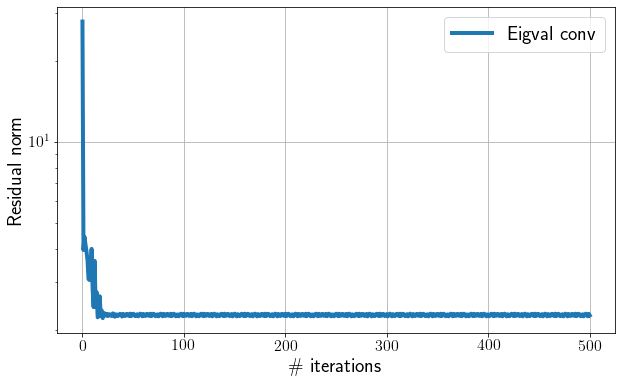

In [91]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

#### Какие собственные значения удаётся восстановить, а какие нет?

## Резюме

- Сходимость степенного метода
- Аналог степенного метода для задачи поиска максимального сингулярного значения
- Блочный степенной метод 
- Операция ```einsum``` и эффективный способ вычисления диагонали произведения матриц